# Time Series

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Files

In [46]:
full_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Full.csv")
full_df["Date"] = pd.to_datetime(full_df["Date"], format="%Y-%m-%d")
full_df = full_df[(full_df["Date"] >= pd.Timestamp(2019,3,1)) & 
                  (full_df["Date"] <= pd.Timestamp(2019,3,1))].reset_index().drop(columns=["index"])
full_df.sort_values(by=["Date", "Hour"], inplace=True)

pred_reg_df = pd.read_csv("../../../Data_thesis/Full_Datasets/rfg_Predictions.csv")
pred_reg_df["Date"] = pd.to_datetime(pred_reg_df["Date"], format="%Y-%m-%d")
pred_reg_df = pred_reg_df[(pred_reg_df["Date"] >= pd.Timestamp(2019,3,1)) & 
                  (pred_reg_df["Date"] <= pd.Timestamp(2019,3,1))].reset_index().drop(columns=["index"])
pred_reg_df["Hour"].replace(2400, 0, inplace=True)
pred_reg_df.sort_values(by=["Date", "Hour"], inplace=True)

In [57]:
pred_clas_df = pd.read_csv("../../../Data_thesis/Full_Datasets/rfc_Predictions.csv")
pred_clas_df["Date"] = pd.to_datetime(pred_clas_df["Date"], format="%Y-%m-%d")
pred_clas_df = pred_clas_df[(pred_clas_df["Date"] >= pd.Timestamp(2019,3,1)) & 
                  (pred_clas_df["Date"] <= pd.Timestamp(2019,3,1))].reset_index().drop(columns=["index"])
pred_clas_df["Hour"].replace(2400, 0, inplace=True)
pred_clas_df.sort_values(by=["Date", "Hour"], inplace=True)

In [42]:
pred_reg_df.head()

,Date,Hour,Sensor,SensorLongitude,SensorLatitude,CrowdednessCount
0,2019-03-01,100,GAWW-03,4.897334,52.372524,1470
24,2019-03-01,100,GAWW-07,4.900441,52.374414,1519
48,2019-03-01,100,GAWW-01,4.899847,52.374601,1543
72,2019-03-01,100,GAWW-02,4.898903,52.373786,1557
96,2019-03-01,100,GAWW-04,4.897908,52.373283,1459


In [35]:
full_df.head()

,Date,Hour,Nieuwmarkt Lat,Nieuwmarkt Lon,Nieuwezijds Kolk Lat,Nieuwezijds Kolk Lon,Dam Lat,Dam Lon,Spui Lat,Spui Lon,...,Nieuwmarkt score,Nieuwmarkt weight,Nieuwezijds Kolk score,Nieuwezijds Kolk weight,Dam score,Dam weight,Spui score,Spui weight,Centraal Station score,Centraal Station weight
44,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,615.778610,1.107515,1.145154,0.042413,-25.481470,-1.498910,-0.0,-2.628303,4363.422270,1.034722
45,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,564.399854,1.015108,11.372339,0.421198,-6.014425,-0.353790,-0.0,-0.972760,1823.331290,0.432376
46,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,533.191297,0.958977,12.960231,0.480009,-3.778391,-0.222258,-0.0,-0.814280,1544.987616,0.366371
47,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,528.647173,0.950804,16.327038,0.604705,-4.809838,-0.282932,-0.0,-1.073950,2601.531741,0.616915
48,2019-01-01,100,52.371942,4.901239,52.376288,4.893731,52.373127,4.89008,52.369097,4.889259,...,490.470648,0.882141,15.863076,0.587521,-1.205387,-0.070905,-0.0,-0.681885,1461.947706,0.346680


## Plots

In [47]:
x_1 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-01"]["CrowdednessCount"].values.reshape(-1,1)
x_2 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-02"]["CrowdednessCount"].values.reshape(-1,1)
x_3 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-03"]["CrowdednessCount"].values.reshape(-1,1)
x_4 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-04"]["CrowdednessCount"].values.reshape(-1,1)
x_5 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-05"]["CrowdednessCount"].values.reshape(-1,1)
x_6 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-06"]["CrowdednessCount"].values.reshape(-1,1)
x_7 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-07"]["CrowdednessCount"].values.reshape(-1,1)
date = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-03"]["Hour"] 
date = date.values.reshape(-1,1)

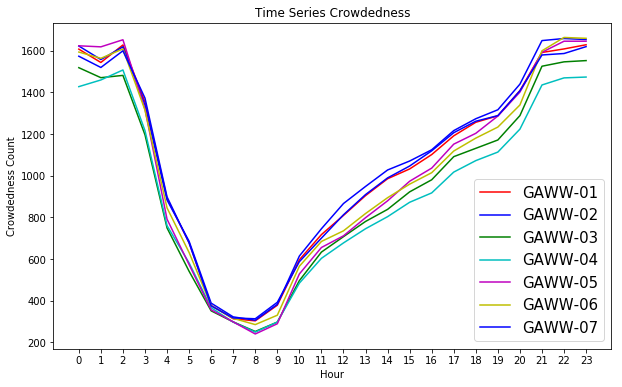

In [48]:
plt.figure(figsize=(10,6))
plt.plot(date,x_1, "r", label="GAWW-01")
plt.plot(date,x_2, "b", label="GAWW-02")
plt.plot(date,x_3, "g", label="GAWW-03")
plt.plot(date,x_4, "c", label="GAWW-04")
plt.plot(date,x_5, "m", label="GAWW-05")
plt.plot(date,x_6, "y", label="GAWW-06")
plt.plot(date,x_7, "b", label="GAWW-07")


plt.legend(prop={"size": 15})
plt.xticks(range(0,2400,100), ("0","1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13",
                          "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"))
plt.yticks(range(200, 1800, 200))
plt.xlabel("Hour")
plt.ylabel("Crowdedness Count")
plt.title("Time Series Crowdedness")
plt.savefig('../../../Data_thesis/Useful/timeSeries.png')

In [58]:
x_1 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-01"]["CrowdednessCount"].values.reshape(-1,1)
x_2 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-02"]["CrowdednessCount"].values.reshape(-1,1)
x_3 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-03"]["CrowdednessCount"].values.reshape(-1,1)
x_4 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-04"]["CrowdednessCount"].values.reshape(-1,1)
x_5 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-05"]["CrowdednessCount"].values.reshape(-1,1)
x_6 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-06"]["CrowdednessCount"].values.reshape(-1,1)
x_7 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-07"]["CrowdednessCount"].values.reshape(-1,1)
date = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-03"]["Hour"]
date = date.values.reshape(-1,1)

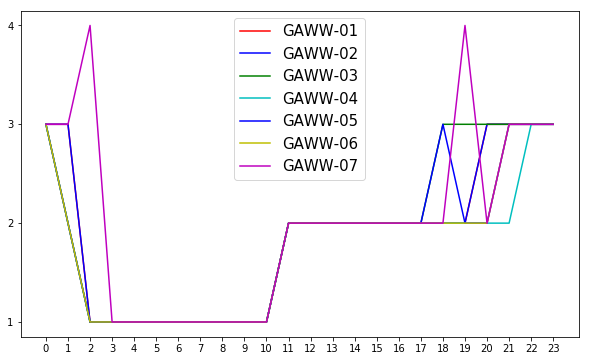

In [59]:
plt.figure(figsize=(10,6))
plt.plot(date,x_1, "r", label="GAWW-01")
plt.plot(date,x_2, "b", label="GAWW-02")
plt.plot(date,x_3, "g", label="GAWW-03")
plt.plot(date,x_4, "c", label="GAWW-04")
plt.plot(date,x_5, "b", label="GAWW-05")
plt.plot(date,x_6, "y", label="GAWW-06")
plt.plot(date,x_7, "m", label="GAWW-07")


plt.legend(prop={"size": 15})
plt.yticks(range(1,5,1), ("1", "2", "3", "4"))
plt.xticks(range(0,2400,100), ("0","1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13",
                          "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"))
plt.savefig('../../../Data_thesis/Useful/clas_timeSeries.png')